In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Single Variate Analysis on the Reviews Made by customers
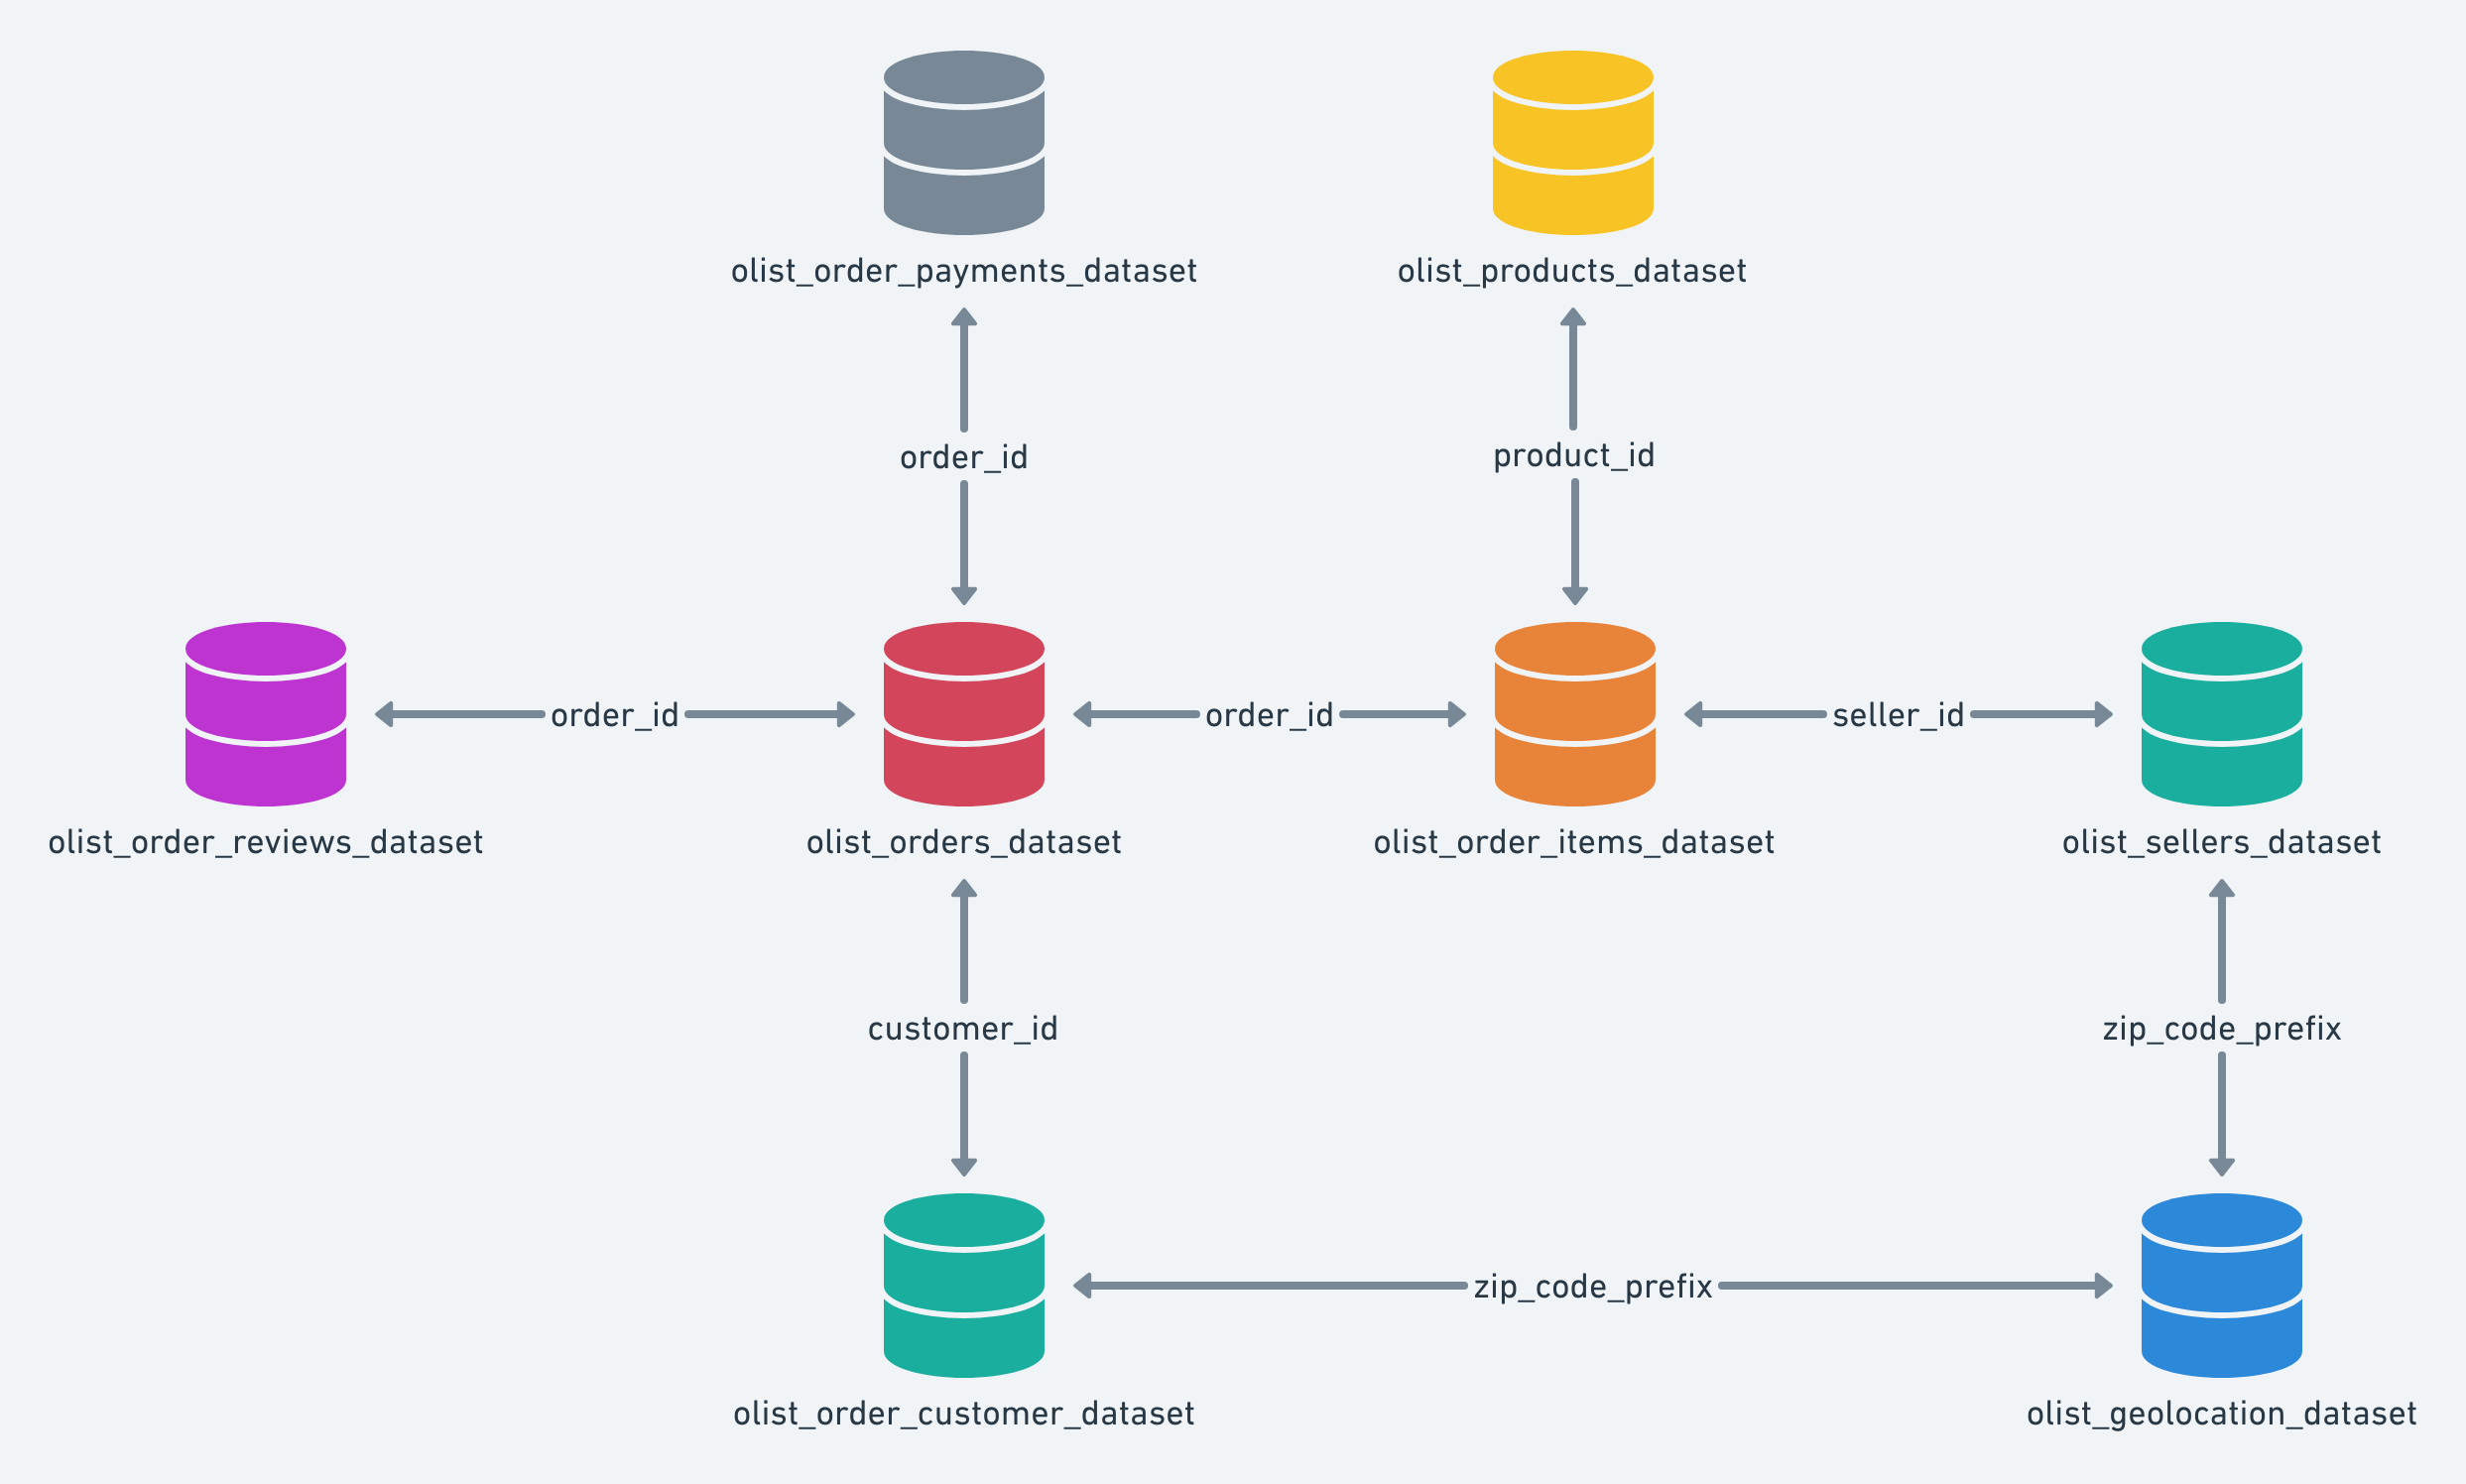


# Information about the Reviews Datasets
The reviews are under the **olist_order_reviews_dataset**. Under this dataset, there is a `review_score` that ranges 'from 1 to 5 given by the customer on a satisfaction survery'(cited from kaggle website and its documentation). 

The `review_comments` and `review_title` are written in portuguese and not all customers give reviews. This is unstructured data and may need different types of machine learning techniques. However, the limitations are:
1. Just because a customer does not give reviews, does not mean they are unhappy or very upset about their customer experience. It could mean that they do not have enough time, or they simply do not find a need to do so. It could also be that the process of writing comments is cumbersome. 
2. Translation errors could occur. While interpreting feelings from language is intself difficult, translating languages ineherently cause problems as the translation may not be accurate. (e.g. some languages do not have the word snow in their dictionary because they simply do not have to use it). 
3. Unstructured data is inherently difficult to translate into numeric form where we can analyse

Information such `review_creation_date` and `review_answer_timestamp` are important to see how reviews for products change over time 

# Information about the Products Datasets

The product information is under the **olist_products_dataset**. Under this dataset, there is a `product_category_name` which is necessary to see which products were sold. Do note that these are the root category of product written in portuguese. In this case, having to analyse product type leaves no choice but to translate it. However, the error rate would be lower since these are objective pronouns as opposed to feelings. For example, perfume will remain perfume across different lanuages. However, words like happy, sad may have different intensities of such "feelings". 

# Information about the Orders Dataset

The order information is under the **olist_orders_dataset**. Under this dataset, there is a `order_delivered_customer date` which 'Shows the actual order delivery date to the customer'(cited from https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_orders_dataset.csv). 

We need this data to see the change in product orders over time. 

# Information on the number of data points per dataset

In [2]:
olist_customers_dataset = pd.read_csv("olist_customers_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
olist_sellers_dataset = pd.read_csv("olist_sellers_dataset.csv")
olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")

In [3]:
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [5]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
olist_products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [7]:
olist_sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [8]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


# Analysis thus far
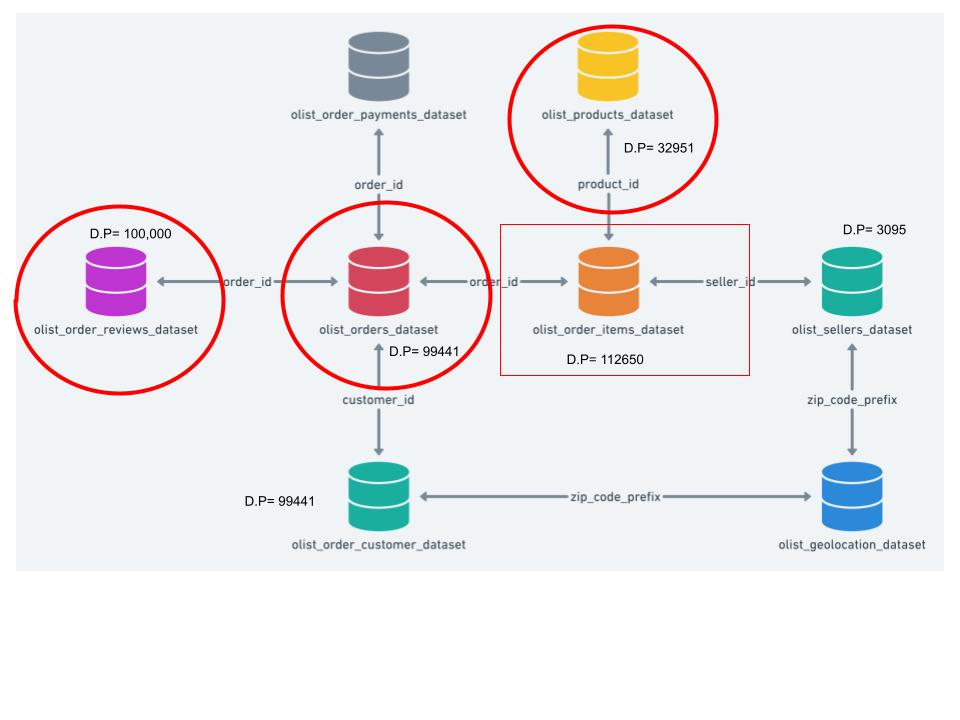
D.P means Data points
the circled datasets are needed, the rectangle shows the potential dataset needed to link it. 

The **olid_orders_dataset** and **olist_customer_dataset** have the same number of data points. 

From the kaggle website, there are 99173 unique `review_ids` and 99441 unique `order_id` which corresponds to the `customer_id`. This value of `customer_id` 99441 is unique. `customer_unique_id` is not needed since it identifies to the customer and not to the order dataset. 

This research question is how review affects future purchases regardless of the "unique customer". It can be the same customer buying it multiple times in the same time period. 

duplicated order_id in the review dataset needs to be removed. 

# Review dataset cleaning before merging 

In [9]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,3/1/2018 0:00,3/2/2018 10:26


In [10]:
duplicate_last = olist_order_reviews_dataset[olist_order_reviews_dataset.duplicated(subset="order_id", keep='last')] 
duplicate_first = olist_order_reviews_dataset[olist_order_reviews_dataset.duplicated(subset="order_id", keep='first')] 

In [11]:
duplicate_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 30 to 98361
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                559 non-null    object
 1   order_id                 559 non-null    object
 2   review_score             559 non-null    int64 
 3   review_comment_title     18 non-null     object
 4   review_comment_message   202 non-null    object
 5   review_creation_date     559 non-null    object
 6   review_answer_timestamp  559 non-null    object
dtypes: int64(1), object(6)
memory usage: 34.9+ KB


In [12]:
duplicate_last.describe()

,review_score
count,559.000000
mean,4.019678
std,1.398145
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [13]:
duplicate_first.describe()

,review_score
count,559.000000
mean,4.001789
std,1.394432
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


# Analysis check point 
This means that despite having the same order id, there have been different reviews given to the same order_id. 
Hence, we need to check which have the same order_id and the same review_score

In [14]:
duplicate_first = olist_order_reviews_dataset[olist_order_reviews_dataset.duplicated(subset=["order_id", "review_score"], keep='first')] 

In [15]:
duplicate_first.info()
duplicate_first.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 1128 to 99974
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                350 non-null    object
 1   order_id                 350 non-null    object
 2   review_score             350 non-null    int64 
 3   review_comment_title     11 non-null     object
 4   review_comment_message   107 non-null    object
 5   review_creation_date     350 non-null    object
 6   review_answer_timestamp  350 non-null    object
dtypes: int64(1), object(6)
memory usage: 21.9+ KB


,review_score
count,350.000000
mean,4.382857
std,1.209676
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Analysis 
There are 350 order ids which are the same and which have the same review_score, hence they can be excluded from the analysis. 
There are 209 values with different review_score but same order_id. 
Remove duplicate order_id and review_score rows, which are 350 of them 

In [16]:
olist_order_reviews_dataset.drop_duplicates(subset=["review_score", "order_id"], inplace = True)

In [17]:
olist_order_reviews_dataset.describe()

,review_score
count,99650.000000
mean,4.069794
std,1.360040
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Now for single variate analysis and visual analysis on the scores

In [18]:
def basic_single_variate_analysis(dataframe, var):
    f, axes = plt.subplots(1, 3, figsize=(10, 10))
    sb.boxplot(data = dataframe[var], orient = "h", color='g', ax = axes[0])
    sb.histplot(data = dataframe[var], ax = axes[1])
    sb.violinplot(data = dataframe[var], orient = "h", color='r', ax = axes[2])

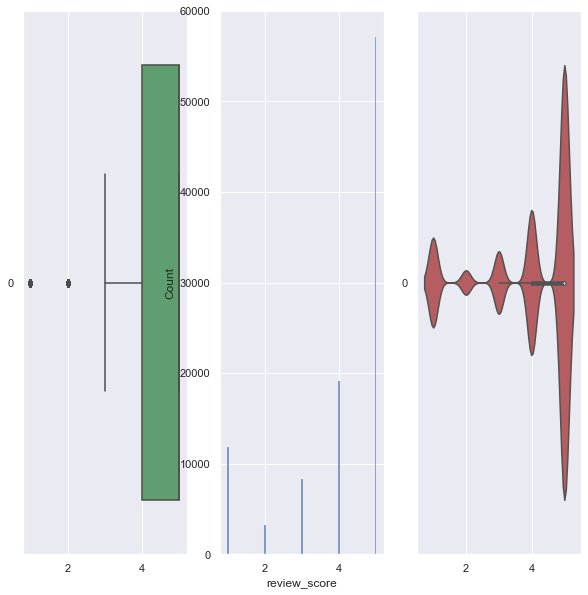

In [19]:
basic_single_variate_analysis(olist_order_reviews_dataset, 'review_score')

# By Year Analysis and Order_Status

In [20]:
yearAnalysis = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')
copiedyearAnalysis = yearAnalysis

In [21]:
copiedyearAnalysis["order_status"] = copiedyearAnalysis["order_status"].astype('category')
copiedyearAnalysis.dtypes

order_id                           object
customer_id                        object
order_status                     category
order_purchase_timestamp           object
order_approved_at                  object
order_delivered_carrier_date       object
order_delivered_customer_date      object
order_estimated_delivery_date      object
review_id                          object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date               object
review_answer_timestamp            object
dtype: object

<AxesSubplot:xlabel='review_score', ylabel='order_status'>

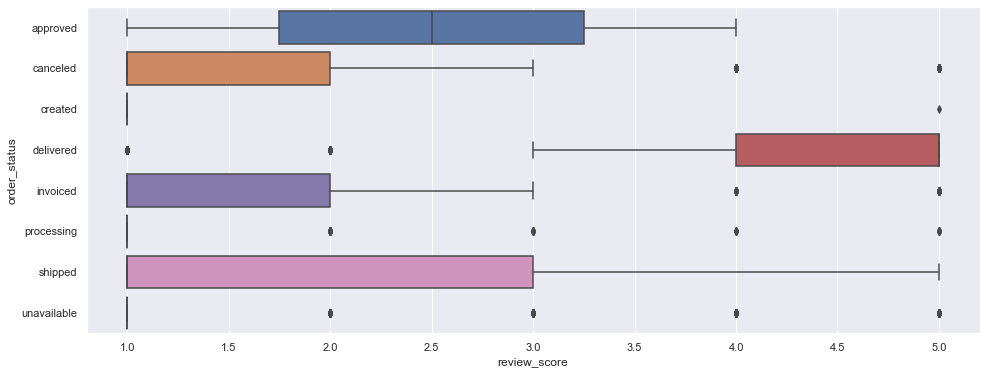

In [22]:
plt.figure(figsize=(16, 6))
sb.boxplot(x='review_score', y="order_status", data=copiedyearAnalysis)

# Analysis 
From the above graph, we can see that the review scores for delivered status is significantly much higher than that of the other types of order status. 

**Here are some reasons why each order status is as so:**
1. Approved: Seems that although it was approved, the product did not make it to the customers. Clearly, this will result to customers giving a bad review score
2. Cancelled: this is a effie status because it can be cancelled by the customer due to various reasons, or it could be cancelled by the company
3. Created: could possibly be left undelivered
4. Invoiced: payment made but not delivered? Which is really bad but yet they were getting review scores of 5??
5. Processing: hmm maybe at the point of data collection it seems like they made the review
6. Shipped: wells this is something i am not sure of
7. Unavailable: something that we DO NOT want to include in machine learning process.


### Review Status and Order Status
A clear indication of whether the review score is low or high is the order status. 

97% is of the delivered order status this is taken from the kaggle website. 

so it seems the best to narrow it down to delivered order status.


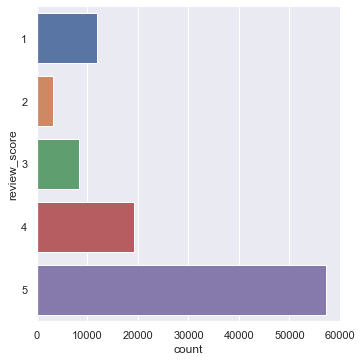

In [23]:
sb.catplot(y = "review_score", data = yearAnalysis, kind = "count")

In [24]:
yearAnalysis = yearAnalysis.loc[(yearAnalysis["order_status"]=="delivered")]

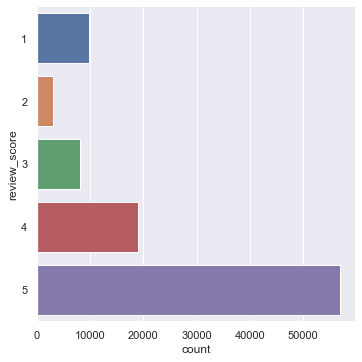

In [25]:
sb.catplot(y = "review_score", data = yearAnalysis, kind = "count")

# One concern here 
any difference between order_delivered_customer_date and review_creation_date??
maybe it can contribute?
next must do the time difference the approved at - delivered date

In [26]:
# we only need review_score and order_delivered customer date and review creation date
yearAnalysis = pd.DataFrame(yearAnalysis[['review_score','review_creation_date']])

In [27]:
yearAnalysis.head()

,review_score,review_creation_date
0,4,10/11/2017 0:00
1,4,8/8/2018 0:00
2,5,8/18/2018 0:00
3,5,12/3/2017 0:00
4,5,2/17/2018 0:00


In [28]:
yearAnalysis['review_creation_date'] = pd.to_datetime(yearAnalysis['review_creation_date'])

In [29]:
yearAnalysis.head()

,review_score,review_creation_date
0,4,2017-10-11
1,4,2018-08-08
2,5,2018-08-18
3,5,2017-12-03
4,5,2018-02-17


In [30]:
year2017 = yearAnalysis.loc[(yearAnalysis["review_creation_date"]>="2017-01-01") & (yearAnalysis["review_creation_date"]<="2018-01-01")]

In [31]:
year2018 = yearAnalysis.loc[(yearAnalysis["review_creation_date"]>="2018-01-01") & (yearAnalysis["review_creation_date"]<="2019-01-01")]
year2018.reset_index(drop=True, inplace=True)


In [32]:
year2016 = yearAnalysis.loc[(yearAnalysis["review_creation_date"]>="2016-01-01") & (yearAnalysis["review_creation_date"]<="2017-01-01")]
year2016.reset_index(drop=True, inplace=True)

In [33]:
year2016

,review_score,review_creation_date
0,1,2016-10-21
1,1,2016-10-22
2,3,2016-10-25
3,1,2016-10-27
4,4,2016-10-28
...,...,...
263,5,2016-11-18
264,4,2016-11-01
265,1,2016-11-11
266,3,2016-10-26


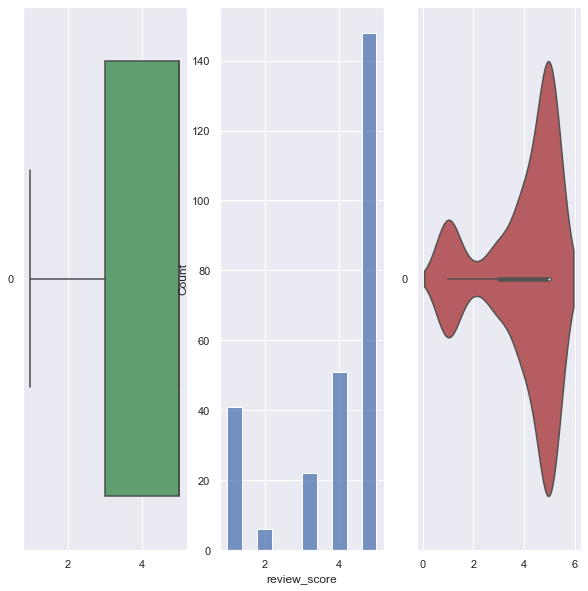

In [34]:
basic_single_variate_analysis(year2016, 'review_score')

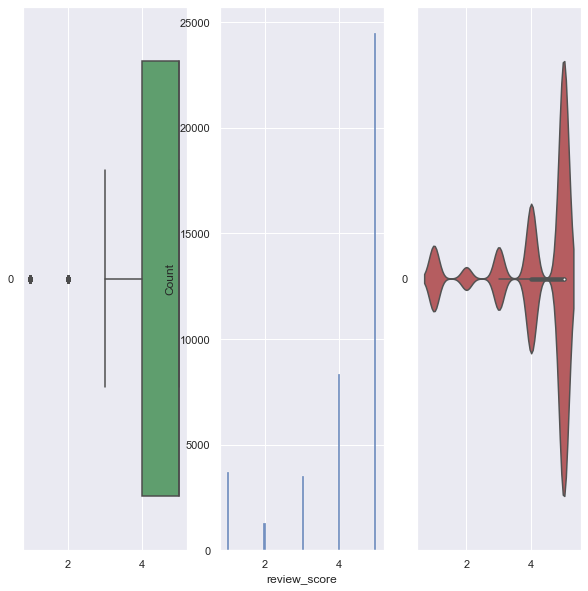

In [35]:
basic_single_variate_analysis(year2017, 'review_score')

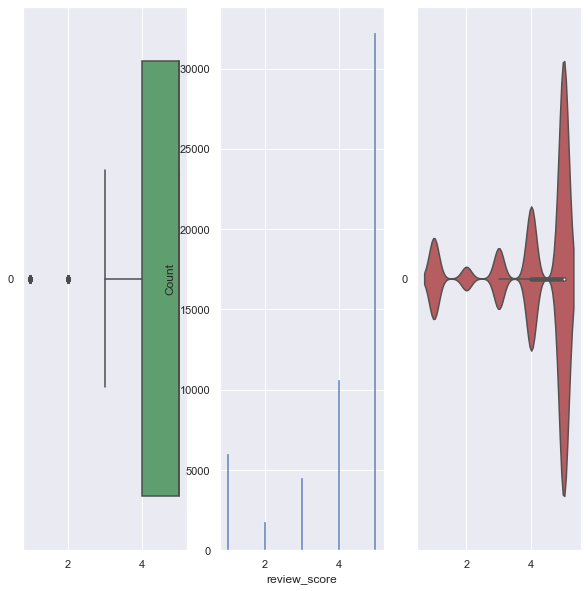

In [36]:
basic_single_variate_analysis(year2018, 'review_score')

In [37]:
year2018.describe()

,review_score
count,55077.000000
mean,4.113913
std,1.326948
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [38]:
describe_table = year2016.describe()

In [39]:
describe_table = describe_table.join(year2017.describe(), lsuffix="_2016", rsuffix="_2017")

In [40]:
describe_table = describe_table.join(year2018.describe())
describe_table.rename(columns={"review_score": "review_score_2018"}, inplace = True)

In [41]:

describe_table.to_csv("Review_Score table.csv", index = True)

In [42]:
describe_table.head()

,review_score_2016,review_score_2017,review_score_2018
count,268.000000,41334.000000,55077.000000
mean,3.966418,4.178763,4.113913
std,1.451717,1.253820,1.326948
min,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000


# Overall, the mean review_score across the different years given any product has changed much except from 2016 to 2017 seems like a large increase! interesting 